# Área de imports

In [1]:
import pandas as pd
import seaborn as sns
import texthero as hero
import matplotlib.pyplot as plt

# Carregamento dos dados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/LucasRotsen/tcc_case_study_tutorial/main/data/SMSSpamCollection.txt', sep='\t', names=["label", "message", "x"])

#### Visualizando o conteúdo do Dataframe

In [3]:
df

,label,message,x
0,spam,free entry wkly comp win fa cup final tkts 21s...,155
1,spam,freemsg hey darling week word back like fun st...,147
2,spam,winner valued network customer selected receiv...,157
3,spam,mobile months u r entitled update latest colou...,154
4,spam,six chances win cash pounds txt csh11 send cos...,136
...,...,...,...
1395,ham,lots used ones babe model help youi bring match,107
1396,ham,also bringing galileo dobby,38
1397,ham,responding,27
1398,ham,boo babe u enjoyin yourjob u seemed b gettin w...,124


#### Deletando a coluna que não iremos utilizar

In [4]:
df.drop(columns=['x'], inplace=True)

# Análise exploratória dos dados

#### Colunas presentes

In [5]:
list(df.columns)

['label', 'message']

#### Quantidade de observações

In [6]:
df.shape[0]

1400

#### Visualizando amostra por coluna

In [7]:
df[df['label'] == 'spam'].head(5)

,label,message
0,spam,free entry wkly comp win fa cup final tkts 21s...
1,spam,freemsg hey darling week word back like fun st...
2,spam,winner valued network customer selected receiv...
3,spam,mobile months u r entitled update latest colou...
4,spam,six chances win cash pounds txt csh11 send cos...


In [8]:
df[df['label'] == 'ham'].head(5)

,label,message
700,ham,go jurong point crazy available bugis n great ...
701,ham,ok lar joking wif u oni
702,ham,u dun say early hor u c already say
703,ham,nah think goes usf lives around though
704,ham,even brother like speak treat like aids patent


#### Dados faltantes por coluna

In [9]:
df.isna().sum()

label      0
message    1
dtype: int64

#### Visualizando as linhas com dados faltantes

In [10]:
df[df.isna().any(axis=1)]

,label,message
915,ham,NaN


#### Deletando os dados faltantes

Podemos fazer isso tranquilamente, uma vez que existe apenas UM valor faltante

In [11]:
df.dropna(inplace=True)

#### Distribuição de classes

<AxesSubplot:>

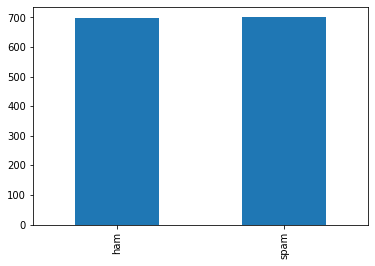

In [12]:
df.label.value_counts().sort_values().plot(kind = 'bar')

#### Média do tamanho da mensagem por classe

In [13]:
# Cria uma nova coluna com o tamanho da mensagem
df['message-size'] = df['message'].apply(lambda x: len(x))

# Calcula a média por classe
df.groupby('label')['message-size'].mean()

label
ham     43.991416
spam    92.261429
Name: message-size, dtype: float64

#### As #20 Palavras mais comuns do dataset para a categoria SPAM

In [14]:
# Removendo "stopwords", dígitos, e pontuação

def text_cleansing(df: pd.DataFrame, column_name: str):
    custom_pipeline = [hero.preprocessing.lowercase,
                       hero.preprocessing.remove_digits,
                       hero.preprocessing.remove_punctuation,
                       hero.remove_stopwords,
                       hero.remove_whitespace]

    return hero.clean(df[column_name], custom_pipeline)

In [15]:
df['message'] = text_cleansing(df, 'message')

In [16]:
# selecionando as 20 palavras mais frequentes

def collect_n_most_frequent_words(df: pd.DataFrame, column: str, n: int):
    if n < 0: return {}
    return pd.Series(' '.join(df[column]).lower().split()).value_counts()[:n].to_dict()

In [17]:
spam_df = df[df['label'] == 'spam']
top_20 = collect_n_most_frequent_words(spam_df, 'message', 20)

/home/lucasrotsen/Git_Repos/tcc_case_study_tutorial/.env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


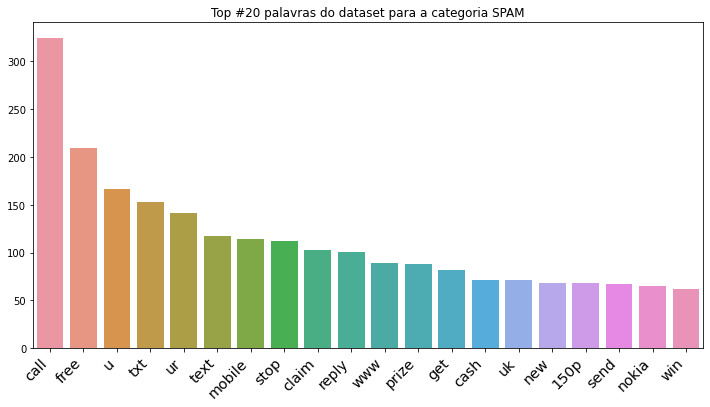

In [18]:
# plotando a informação em um gráfico
plt.figure(figsize=(12,6))

chart = sns.barplot(
    list(top_20.keys()), 
    list(top_20.values())
).set_title('Top #20 palavras do dataset para a categoria SPAM')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

# Testes unitários

In [19]:
import unittest

In [20]:
class TestTextCleansing(unittest.TestCase):
    
    def setUp(self):
        self.df = pd.DataFrame({
            'text': [
                'TEST',
                '4 5 6 98 test',
                '.;!?$# test',
                'sure thing we can do this',
                'game       today   '
            ]
        })
    
    def test_make_lower_case(self):
        df = pd.DataFrame()
        expected_text = 'test'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[0], expected_text)     
    
    def test_remove_digits(self):
        df = pd.DataFrame()
        expected_text = 'test'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[1], expected_text) 
    
    def test_remove_punctuation(self):
        df = pd.DataFrame()
        expected_text = 'test'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[2], expected_text) 
    
    def test_remove_stopwords(self):
        df = pd.DataFrame()
        expected_text = 'sure thing'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[3], expected_text)
    
    def test_remove_whitespace(self):
        df = pd.DataFrame()
        expected_text = 'game today'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[4], expected_text)

In [21]:
class TestCollectNMostFrequentWords(unittest.TestCase):
    
    def setUp(self):
        self.df = pd.DataFrame({
            'text': [
                'This is only a test.',
                'This is another test, now with a bigger phrase.',
                'Yet another test here, I promise i\'m almost done.',
                'Last test here, yay!',
                'Kidding, there\'s one more test' 
            ]
        })
        
    def test_correct_number_of_words_returned(self):
        top_0 = collect_n_most_frequent_words(self.df, 'text', 0)
        self.assertEqual(len(top_0), 0)
        
        top_1 = collect_n_most_frequent_words(self.df, 'text', 1)
        self.assertEqual(len(top_1), 1)
        
        top_5 = collect_n_most_frequent_words(self.df, 'text', 5)
        self.assertEqual(len(top_5), 5)
    
    def test_correct_words_returned(self):
        expected_values = ['test', 'another', 'here,', 'is', 'this']
        
        top_5 = collect_n_most_frequent_words(self.df, 'text', 5)
        self.assertEqual(list(top_5.keys()), expected_values)
    
    def test_invalid_number_of_words_ordered(self):
        expected_value = {}
        
        top_neg_1 = collect_n_most_frequent_words(self.df, 'text', -1)
        self.assertEqual(top_neg_1, expected_value)

In [22]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_correct_number_of_words_returned (__main__.TestCollectNMostFrequentWords) ... ok
test_correct_words_returned (__main__.TestCollectNMostFrequentWords) ... ok
test_invalid_number_of_words_ordered (__main__.TestCollectNMostFrequentWords) ... ok
test_make_lower_case (__main__.TestTextCleansing) ... ok
test_remove_digits (__main__.TestTextCleansing) ... ok
test_remove_punctuation (__main__.TestTextCleansing) ... ok
test_remove_stopwords (__main__.TestTextCleansing) ... ok
test_remove_whitespace (__main__.TestTextCleansing) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.020s

OK
